In [1]:
# mutliple outputs in cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Imports and data folder path

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json

PATH_IN = './data/'

colors = sns.color_palette("colorblind")
sns.set_palette(colors)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

### Plot Summaries (Train data 1)
Plot summaries of 42,306 movies extracted from the November 2, 2012 dump of English-language Wikipedia. Each line contains the Wikipedia movie ID (which indexes into movie.metadata.tsv) followed by the summary.

In [3]:
plot_summaries_fname = os.path.join(PATH_IN, 'plot_summaries.txt')

plot_summaries = pd.read_csv(plot_summaries_fname, sep='\t', names=['Wikipedia movie id', 'plot_summary'])
plot_summaries['Wikipedia movie id'] = pd.to_numeric(plot_summaries['Wikipedia movie id'], downcast='integer') # unsigned for uint, in terms of memory same result
plot_summaries['plot_summary'] = plot_summaries['plot_summary'].astype('string')

plot_summaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Wikipedia movie id  42303 non-null  int32 
 1   plot_summary        42303 non-null  string
dtypes: int32(1), string(1)
memory usage: 495.9 KB


### Stanford CoreNLP processed XML datasets (Train data 2)
The plot summaries, run through the Stanford CoreNLP pipeline (tagging, parsing, NER and coref). Each filename begins with the Wikipedia movie ID (which indexes into movie.metadata.tsv).

[Paper](https://www.cs.cmu.edu/~dbamman/pubs/pdf/bamman+oconnor+smith.acl13.pdf)

[Dependency glossary](https://downloads.cs.stanford.edu/nlp/software/dependencies_manual.pdf)

In [4]:
tokens_fname = os.path.join(PATH_IN, 'tokens.parquet')
dependencies_fname = os.path.join(PATH_IN, 'dependencies.parquet')
parses_fname = os.path.join(PATH_IN, 'parses.parquet')
coref_fname = os.path.join(PATH_IN, 'coref.parquet')

tokens = pd.read_parquet(tokens_fname)
dependencies = pd.read_parquet(dependencies_fname)
parses = pd.read_parquet(parses_fname)
coref = pd.read_parquet(coref_fname)

tokens.info()
dependencies.info()
parses.info()
coref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14905203 entries, 0 to 14905202
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   movie_id     int32 
 1   sentence_id  int16 
 2   token_id     int16 
 3   word         string
 4   lemma        string
 5   COB          int16 
 6   COE          int16 
 7   POS          string
 8   NER          string
dtypes: int16(4), int32(1), string(4)
memory usage: 625.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34199068 entries, 0 to 34199067
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   movie_id          int32 
 1   sentence_id       int16 
 2   dependency_class  string
 3   dependency_type   string
 4   governor_id       int16 
 5   governor_word     string
 6   dependent_id      int16 
 7   dependent_word    string
dtypes: int16(3), int32(1), string(4)
memory usage: 1.3 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665586 entries, 0 to 665585

### Movies metadata (Train data 3)

Metadata for 81,741 movies, extracted from the Noverber 4, 2012 dump of Freebase. Tab-separated; columns.
1. Wikipedia movie ID
2. Freebase movie ID
3. Movie name
4. Movie release date
5. Movie box office revenue
6. Movie runtime
7. Movie languages (Freebase ID:name tuples)
8. Movie countries (Freebase ID:name tuples)
9. Movie genres (Freebase ID:name tuples)

In [114]:
movie_fname = os.path.join(PATH_IN, 'movie.metadata.tsv')

movie_column_names = [
    "Wikipedia movie ID", 
    "Freebase movie ID", 
    "Movie name", 
    "Movie release date", 
    "Movie box office revenue", 
    "Movie runtime", 
    "Movie languages", 
    "Movie countries", 
    "Movie genres",
]

movies = pd.read_csv(movie_fname,  sep= '\t', names= movie_column_names)
movies.info()

movies.loc[46808, 'Movie countries'] = '{"/m/03rk0": "India"}'
movies.loc[67202, 'Movie countries'] = '{"/m/03rk0": "India"}'
movies.loc[67202, 'Movie languages'] = '{"/m/0999q": "Malayalam Language"}'
movies.loc[72685, 'Movie countries'] = '{"/m/084n_": "Weimar Republic", "/m/0345h": "Germany"}'

movies.loc[1825, "Movie languages"] = '{"/m/04306rv": "German Language"}'
movies.loc[7855, "Movie languages"] = '{"/m/02bjrlw": "Italian Language", "/m/06nm1": "Spanish Language", "/m/064_8sq": "French Language", "/m/04h9h": "Latin Language", "/m/02h40lc": "English Language", "/m/05qqm": "Polish Language", "/m/04306rv": "German Language"}'
movies.loc[20807, "Movie languages"] = '{"/m/0k0sv": "Croatian language", "/m/02bjrlw": "Italian Language", "/m/06b_j": "Russian Language", "/m/06nm1": "Spanish Language", "/m/064_8sq": "French Language", "/m/05zjd": "Portuguese Language", "/m/02h40lc": "English Language", "/m/06zvd": "Slovenian language", "/m/04306rv": "German Language", "/m/02hwhyv": "Korean Language"}'
movies.loc[25679, "Movie languages"] = '{"/m/05qqm": "Polish Language", "/m/0cjk9": "Ukrainian Language", "/m/0880p": "Yiddish Language", "/m/04306rv": "German Language"}'
movies.loc[30562, "Movie languages"] = '{"/m/02h40lc": "English Language", "/m/06b_j": "Russian Language", "/m/04306rv": "German Language"}'
movies.loc[68137, "Movie languages"] = '{"/m/02hwyss": "Turkish Language", "/m/04306rv": "German Language"}'

movies['Movie release Year'] = movies['Movie release date'].str.split('-').str[0].astype('Int64')
movies['Movie release Month'] = movies['Movie release date'].str.split('-').str[1].astype('Int64')
movies['Movie release Day'] = movies['Movie release date'].str.split('-').str[2].astype('Int64')
movies.drop(columns=['Movie release date'], inplace=True)

movies['parsed languages'] = movies['Movie languages'].apply(ast.literal_eval)
movies['language codes'] = movies['parsed languages'].apply(lambda x: ','.join(list(x.keys())))
movies['languages'] = movies['parsed languages'].apply(lambda x: ','.join([val.replace(' Language', '') for val in list(x.values())]))
movies.drop(columns=['Movie languages', 'parsed languages'], inplace=True)

movies['parsed countries'] = movies['Movie countries'].apply(ast.literal_eval)
movies['countries codes'] = movies['parsed countries'].apply(lambda x: ','.join(list(x.keys())))
movies['countries'] = movies['parsed countries'].apply(lambda x: ','.join(list(x.values())))
movies.drop(columns=['Movie countries', 'parsed countries'], inplace=True)

movies['parsed genres'] = movies['Movie genres'].apply(ast.literal_eval)
movies['genres codes'] = movies['parsed genres'].apply(lambda x: ','.join(list(x.keys())))
movies['genres'] = movies['parsed genres'].apply(lambda x: ','.join(list(x.values())))
movies.drop(columns=['Movie genres', 'parsed genres'], inplace=True)


movies_probably_not_useful = movies[['Freebase movie ID', 'language codes', 'countries codes', 'genres codes']]
movies.drop(columns=['Freebase movie ID', 'language codes', 'countries codes', 'genres codes'], inplace=True)

movies.rename(columns={
    'languages': 'Movie languages',
    'countries': 'Movie countries',
    'genres': 'Movie genres'
}, inplace=True)
movies = movies[['Wikipedia movie ID', 'Movie name', 'Movie release Year', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres', 
                 'Movie release Month', 'Movie release Day']]

movies['Movie name'] = movies['Movie name'].astype('string')
movies['Movie languages'] = movies['Movie languages'].astype('string')
movies['Movie countries'] = movies['Movie countries'].astype('string')
movies['Movie genres'] = movies['Movie genres'].astype('string')
movies['Wikipedia movie ID'] = pd.to_numeric(movies['Wikipedia movie ID'], downcast='integer')
movies['Movie release Year'] = pd.to_numeric(movies['Movie release Year'], downcast='integer')
movies['Movie release Month'] = pd.to_numeric(movies['Movie release Month'], downcast='integer')
movies['Movie release Day'] = pd.to_numeric(movies['Movie release Day'], downcast='integer')
movies['Movie box office revenue'] = pd.to_numeric(movies['Movie box office revenue'], downcast='float')
movies['Movie runtime'] = pd.to_numeric(movies['Movie runtime'], downcast='float')

movies_probably_not_useful['Freebase movie ID'] = movies_probably_not_useful['Freebase movie ID'].astype('string')
movies_probably_not_useful['language codes'] = movies_probably_not_useful['language codes'].astype('string')
movies_probably_not_useful['countries codes'] = movies_probably_not_useful['countries codes'].astype('string')
movies_probably_not_useful['genres codes'] = movies_probably_not_useful['genres codes'].astype('string')

print("\n")
movies.info()
movies_probably_not_useful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wikipedia movie ID        81741 non-null  int64  
 1   Freebase movie ID         81741 non-null  object 
 2   Movie name                81741 non-null  object 
 3   Movie release date        74839 non-null  object 
 4   Movie box office revenue  8401 non-null   float64
 5   Movie runtime             61291 non-null  float64
 6   Movie languages           81741 non-null  object 
 7   Movie countries           81741 non-null  object 
 8   Movie genres              81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0  

### Characters metadata (Train data 4)

Metadata for 450,669 characters aligned to the movies above, extracted from the Noverber 4, 2012 dump of Freebase. Tab-separated; columns:

1. Wikipedia movie ID
2. Freebase movie ID
3. Movie release date
4. Character name
5. Actor date of birth
6. Actor gender
7. Actor height (in meters)
8. Actor ethnicity (Freebase ID)
9. Actor name
10. Actor age at movie release
11. Freebase character/actor map ID
12. Freebase character ID
13. Freebase actor ID

In [6]:
character_fname = os.path.join(PATH_IN, 'character.metadata.tsv')

character_column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor DOB",
    "Actor gender",
    "Actor height",
    "Actor ethnicity",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID",
]
        
characters = pd.read_csv(character_fname, sep= '\t', names= character_column_names)
characters.info()

characters['Movie release Year'] = characters['Movie release date'].str.split('-').str[0].astype('Int64')
characters['Movie release Month'] = characters['Movie release date'].str.split('-').str[1].astype('Int64')
characters['Movie release Day'] = characters['Movie release date'].str.split('-').str[2].astype('Int64')
characters.drop(columns=['Movie release date'], inplace=True)

characters['Actor DOB'] = characters['Actor DOB'].str.split('T', expand=True)[0]
characters['Actor DOB Year'] = characters['Actor DOB'].str.split('-').str[0].astype('Int64')
characters['Actor DOB Month'] = characters['Actor DOB'].str.split('-').str[1].astype('Int64')
characters['Actor DOB Day'] = characters['Actor DOB'].str.split('-').str[2].astype('Int64')
characters.drop(columns=['Actor DOB'], inplace=True)


characters_probably_not_useful = characters[['Freebase movie ID', 'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID']]
characters.drop(columns=['Freebase movie ID', 'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID'], inplace=True)

characters = characters[['Wikipedia movie ID', 'Movie release Year', 'Character name', 'Actor DOB Year', 'Actor gender', 'Actor height', 'Actor ethnicity', 'Actor name', 
                 'Actor age at movie release', 'Movie release Month', 'Movie release Day', 'Actor DOB Month', 'Actor DOB Day']]

characters['Character name'] = characters['Character name'].astype('string')
characters['Actor ethnicity'] = characters['Actor ethnicity'].astype('string')
characters['Actor name'] = characters['Actor name'].astype('string')


characters['Actor gender'] = characters['Actor gender'].astype('category')

characters['Wikipedia movie ID'] = pd.to_numeric(characters['Wikipedia movie ID'], downcast='integer')
characters['Movie release Year'] = pd.to_numeric(characters['Movie release Year'], downcast='integer')
characters['Actor DOB Year'] = pd.to_numeric(characters['Actor DOB Year'], downcast='integer')
characters['Actor height'] = pd.to_numeric(characters['Actor height'], downcast='float')
characters['Actor age at movie release'] = pd.to_numeric(characters['Actor age at movie release'], downcast='integer')
characters['Movie release Month'] = pd.to_numeric(characters['Movie release Month'], downcast='integer')
characters['Movie release Day'] = pd.to_numeric(characters['Movie release Day'], downcast='integer')
characters['Actor DOB Month'] = pd.to_numeric(characters['Actor DOB Month'], downcast='integer')
characters['Actor DOB Day'] = pd.to_numeric(characters['Actor DOB Day'], downcast='integer')

characters_probably_not_useful['Freebase movie ID'] = characters_probably_not_useful['Freebase movie ID'].astype('string')
characters_probably_not_useful['Freebase character/actor map ID'] = characters_probably_not_useful['Freebase character/actor map ID'].astype('string')
characters_probably_not_useful['Freebase character ID'] = characters_probably_not_useful['Freebase character ID'].astype('string')
characters_probably_not_useful['Freebase actor ID'] = characters_probably_not_useful['Freebase actor ID'].astype('string')

print("\n")
characters.info()
characters_probably_not_useful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               450669 non-null  int64  
 1   Freebase movie ID                450669 non-null  object 
 2   Movie release date               440674 non-null  object 
 3   Character name                   192794 non-null  object 
 4   Actor DOB                        344524 non-null  object 
 5   Actor gender                     405060 non-null  object 
 6   Actor height                     154824 non-null  float64
 7   Actor ethnicity                  106058 non-null  object 
 8   Actor name                       449441 non-null  object 
 9   Actor age at movie release       292556 non-null  float64
 10  Freebase character/actor map ID  450669 non-null  object 
 11  Freebase character ID            192804 non-null  object 
 12  Fr

### tvtropes clusters (Test data 1)

72 character types drawn from tvtropes.com, along with 501 instances of those types. The ID field indexes into the Freebase character/actor map ID in character.metadata.tsv.

In [7]:
tvtropes_clusters_fname = os.path.join(PATH_IN, 'tvtropes.clusters.txt')

rows = []
with open(tvtropes_clusters_fname, 'r') as file:
    for line in file:
        char_type, json_string = line.strip().split('\t', 1)
        
        char_info = json.loads(json_string)
        
        row = {
            'Character type': char_type,
            'Character name': char_info['char'],
            'Movie name': char_info['movie'],
            'Freebase character/actor map ID': char_info['id'],
            'Actor name': char_info['actor']
        }
        rows.append(row)

tvtropes_clusters = pd.DataFrame(rows)
tvtropes_clusters = tvtropes_clusters.astype('string')

tvtropes_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Character type                   501 non-null    string
 1   Character name                   501 non-null    string
 2   Movie name                       501 non-null    string
 3   Freebase character/actor map ID  501 non-null    string
 4   Actor name                       501 non-null    string
dtypes: string(5)
memory usage: 19.7 KB


### Name clusters (Test data 2)

970 unique character names used in at least two different movies, along with 2,666 instances of those types. The ID field indexes into the Freebase character/actor map ID in character.metadata.tsv.

In [10]:
name_clusters_fname = os.path.join(PATH_IN, 'name.clusters.txt')

names_clusters = pd.read_csv(name_clusters_fname, sep='\t', names=['Character name', 'Freebase character/actor map ID'], dtype='string')

names_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Character name                   2666 non-null   string
 1   Freebase character/actor map ID  2666 non-null   string
dtypes: string(2)
memory usage: 41.8 KB


# Data Exploration for idea B : about characters, roles, revenue, etc.

----------------------------------------------------------------------------------

##### Nothing fancy first, just exploring the different dataframes to see what it's all about

### 1. Exploring the movies dataset

From ealier, we know that the movies dataset has 81741 entries.

 #### --> Checking if all entries correspond to unique movies:

In [33]:
print('We have',movies['Wikipedia movie ID'].isna().sum(),'missing Wikipedia movie IDs')

We have 0 missing Wikipedia movie IDs


In [20]:
print('We have',len(movies['Wikipedia movie ID'].unique()),'unique Wikipedia movie Ids in the dataset')

We have 81741 unique Wikipedia movie Ids in the dataset


In [22]:
print('We have',len(movies['Movie name'].unique()),'unique movie names in the dataset')

We have 75478 unique movie names in the dataset


All wikipedia movie IDs are unique, but not all movie names. Might be some duplicate movie names. Examples of movie names that are shared by several wikipedia movie IDs ?

In [28]:
duplicate_movie_names = movies.groupby('Movie name')['Wikipedia movie ID'].nunique()

# Filter for the duplicate movie names
duplicate_movie_names = duplicate_movie_names[duplicate_movie_names > 1]

# Get a list of duplicate movie names
duplicate_movie_names_list = duplicate_movie_names.index.tolist()

# Create a DataFrame containing only the rows with duplicate movie names
duplicates = movies[movies['Movie name'].isin(duplicate_movie_names_list)]

# Print the DataFrame with duplicate movie names
duplicates.head()

,Wikipedia movie ID,Movie name,Movie release Year,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release Month,Movie release Day
5,13696889,The Gangsters,1913,NaN,35.0,"Silent film,English",United States of America,"Short Film,Silent film,Indie,Black-and-white,C...",5,29
6,18998739,The Sorcerer's Apprentice,2002,NaN,86.0,English,South Africa,"Family Film,Fantasy,Adventure,World cinema",<NA>,<NA>
13,171005,Henry V,1989,10161099.0,137.0,English,United Kingdom,"Costume drama,War film,Epic,Period piece,Drama...",11,8
24,31983669,Road to Life,1931,NaN,104.0,Russian,Soviet Union,Drama,9,30
43,26878691,Mysterious Island,1982,NaN,100.0,Standard Mandarin,Hong Kong,"Action/Adventure,Wuxia,Martial Arts Film,Chine...",<NA>,<NA>


In [29]:
movies[movies['Movie name'] == 'The Sorcerer\'s Apprentice']

,Wikipedia movie ID,Movie name,Movie release Year,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release Month,Movie release Day
6,18998739,The Sorcerer's Apprentice,2002,NaN,86.0,English,South Africa,"Family Film,Fantasy,Adventure,World cinema",<NA>,<NA>
18151,18997933,The Sorcerer's Apprentice,1955,NaN,13.0,English,"United States of America,West Germany",Short Film,5,<NA>
49733,12621957,The Sorcerer's Apprentice,2010,215283742.0,111.0,English,United States of America,"Science Fiction,Adventure,Fantasy,Comedy,Drama...",7,8


As expected, very "generic" movie names that are given to different movies in our dataset.

<div class="alert alert-block alert-warning"> --> Retrieve the movies based on their ID, not their name to be safer. </div>

#### --> How many of our movies have NaN values of Box office revenue ?

In [31]:
print('Out of the 81741 movies in the dataset,', movies['Movie box office revenue'].isna().sum(),'have no exploitable Box office revenue values.')

Out of the 81741 movies in the dataset, 73340 have no exploitable Box office revenue values.


That's 89.7 % of all the movie entries.

<div class="alert alert-block alert-warning"> Need to use another dataset to scrape all the box office revenues we can, clearly insufficient for now</div>

### --> Looking at the languages, regions and genres in our dataset



##### Movie languages :


--> How many entries have non-valid / missing Movie languages info ?

In [234]:
print('We have',movies['Movie languages'].isna().sum(),'entries that have missing (NA) movie languages info')


print('We have', movies['Movie languages'].apply(lambda x: len(x) == 0).sum(),'entries that have wrong movie languages info')

We have 0 entries that have missing (NA) movie languages info
We have 13865 entries that have wrong movie languages info


That's 16.96% of the total movie entries.


In the other 67 876 rows with existing info, let's look at the distribution :


A movie can of course contain several "Movie languages".  As this column is a string, what's done below is to simply, from a string and assuming that languages are separated by a ',' withing the string, extract the different languages for each movie to be able to count them using a dictionnary.

In [239]:
def working_strip(curr_string, separator):
    li = []
    string_left = True
    working_string = curr_string
    while string_left:
        loc = working_string.find(separator)
        string_left = (loc != -1)
        if string_left :
            while (working_string[:loc])[0] == ' ' :
                  working_string = working_string[1:]
                  loc-=1 
            li.append(working_string[:loc])
            working_string = working_string[loc + 1:]
        else:
            
            while working_string[:loc][0] == ' ' :
                  working_string = working_string[1:]
                  loc-=1
            li.append(working_string)       
    return li

def string_to_str_lists(str_input):
        process = working_strip(str_input, ',')
        return process

def count_dict(df, column):
    languages_count_dic = {}

    for j, value in enumerate(df.loc[:,column]):
    
        if len(value) != 0 :

            curr_movie_languages = string_to_str_lists(value)
            for lang in curr_movie_languages :
            
                if lang in languages_count_dic :
                    languages_count_dic[lang] += 1 

                else :
                    languages_count_dic[lang] = 1
                #print(languages_count_dic)
    return languages_count_dic

In [247]:
lang_count_dict = count_dict(movies,'Movie languages')

print('We have a total of', len(lang_count_dict),'distinct languages in which movies have been made/translated')

We have a total of 211 distinct languages in which movies have been made/translated


In [261]:
def plot_count_histogram(count_dict,element) :

    sorted_counts = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)

    top_elements, top_counts = zip(*sorted_counts[:20])

    # Create a histogram
    plt.figure(figsize=(12, 6))
    plt.bar(top_elements, top_counts)
    plt.xlabel(element)
    plt.ylabel('Counts')
    plt.title(element+' Counts Histogram')
    plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
    
    plt.xticks(fontsize=8)
    
    plt.show()  

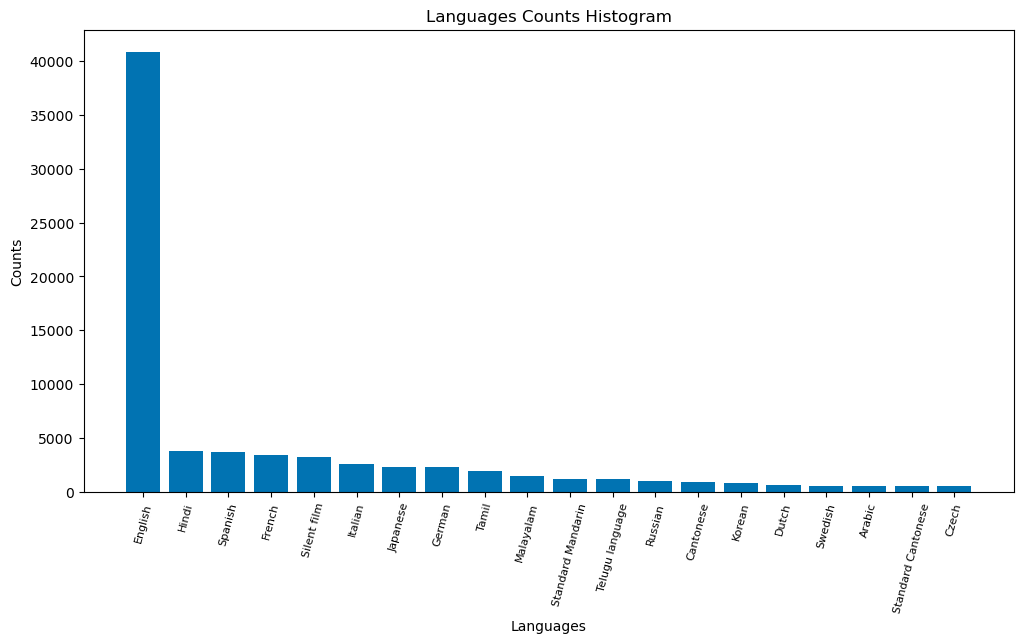

In [262]:
plot_count_histogram(lang_count_dict,'Languages')

<div class="alert alert-block alert-warning"> Still have to check whether ALL the "valid" entries for languages are indeed usable, but it seems to when exploring naively the languages extracted from the latter. Also, extraction has been done assuming that a ',' was separating the strings, have to check if it is always the case but it seems so. <br>


40 891 movies have been distributed in english : careful if doing analysis, huge number compared to the others (3744 for Hindi, even less for the others).

Only plotting the top 20 above for a quick vizualisation of the distribution, unreadable under the histogram form otherwise with more languages
</div>

##### Movie countries 

--> Let's do a similar analysis, but with the Movie countries

In [249]:
print('We have',movies['Movie countries'].isna().sum(),'entries that have missing (NA) movie languages info')

print('We have', movies['Movie countries'].apply(lambda x: len(x) == 0).sum(),'entries that have wrong movie languages info')

We have 0 entries that have missing (NA) movie languages info
We have 8154 entries that have wrong movie languages info


Roughly 10% of the data. Are these ones also the ones with "wrong" Movie languages info?

In [254]:
countries_and_languages_missing = len(movies[movies.apply(lambda row: len(row['Movie languages']) == 0 and len(row['Movie countries']) == 0, axis=1)])
print(countries_and_languages_missing)

5853


Substantial amount, but clearly all of them. Have to check later what to do with them. <br>

Let's try to reproduce the histogram but this time with movie countries :

In [268]:
countries_count_dict = count_dict(movies,'Movie countries')

print('We have a total of', len(countries_count_dict),'distinct countries in which movies have been distributed/made (?)')

We have a total of 145 distinct countries in which movies have been distributed/made (?)


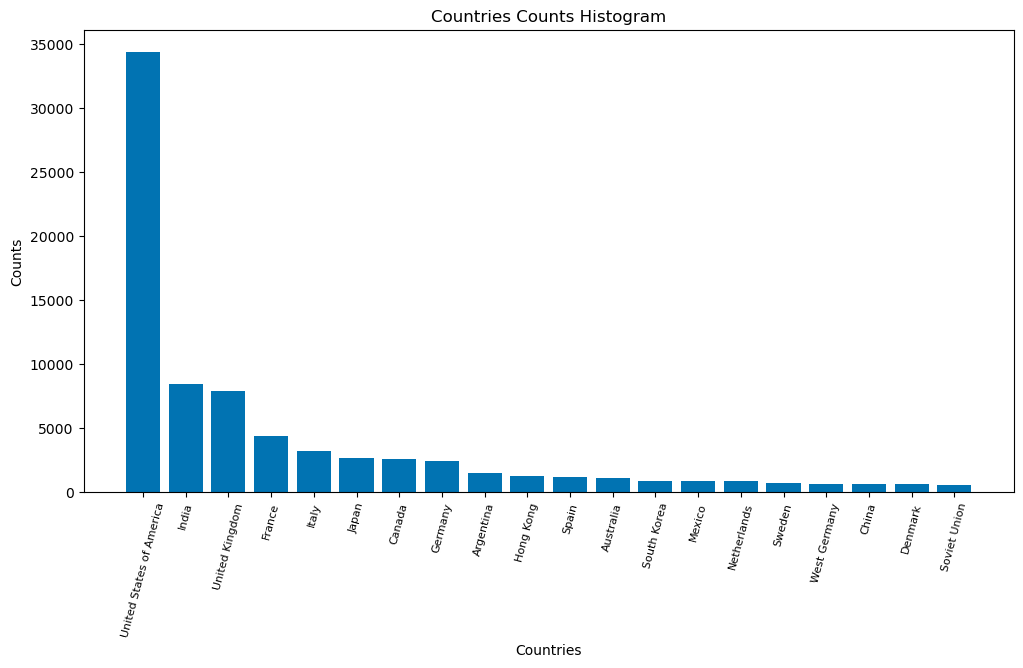

In [263]:
plot_count_histogram(countries_count_dict,'Countries')

<div class="alert alert-block alert-warning"> Once again, predominance of one element. Here, it's the US. Rest of the analysis later

</div>

##### Movie genres :

once again, same analysis

In [264]:
print('We have',movies['Movie genres'].isna().sum(),'entries that have missing (NA) movie languages info')


print('We have', movies['Movie genres'].apply(lambda x: len(x) == 0).sum(),'entries that have wrong movie languages info')

We have 0 entries that have missing (NA) movie languages info
We have 2294 entries that have wrong movie languages info


very few entries with apparently lacking genres info, that's pretty good for idea B

In [265]:
genres_count_dict = count_dict(movies,'Movie genres')

print('We have a total of', len(genres_count_dict),'distinct genres in the movies of our dataset')

We have a total of 363 distinct genres in the movies of our dataset


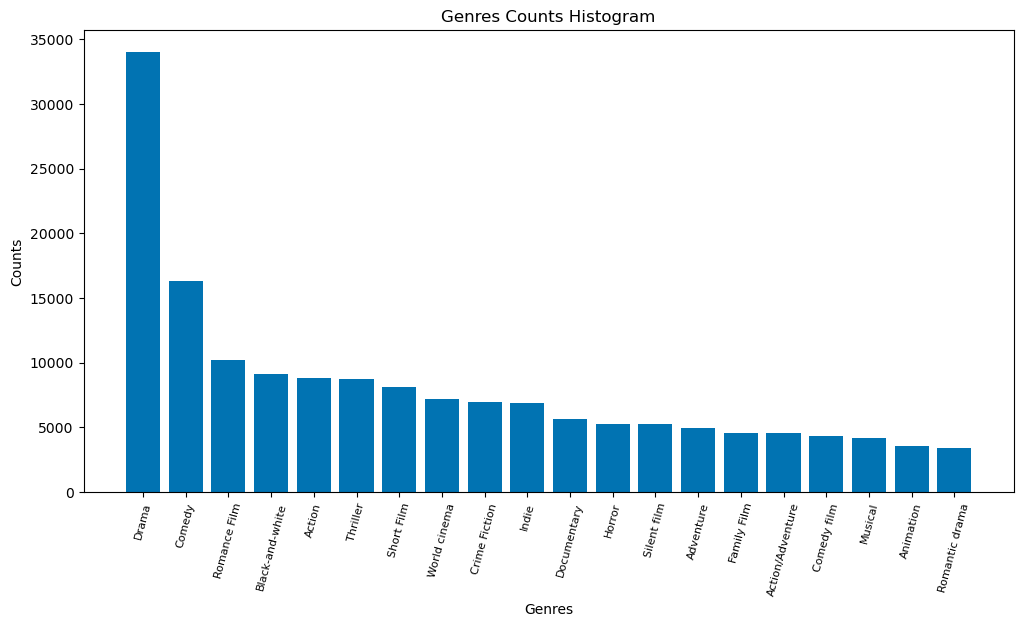

In [266]:
plot_count_histogram(genres_count_dict,'Genres')

<div class="alert alert-block alert-warning"> analysis later j'ai faim sa mère

</div>